In [1]:

import yfinance as yf

data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')  # Apple stock


/tmp/ipython-input-1-636086236.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')  # Apple stock
[*********************100%***********************]  1 of 1 completed


In [2]:
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2264 non-null   float64
 1   (High, AAPL)    2264 non-null   float64
 2   (Low, AAPL)     2264 non-null   float64
 3   (Open, AAPL)    2264 non-null   float64
 4   (Volume, AAPL)  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB


In [3]:
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day moving avg
data['Returns'] = data['Close'].pct_change()


In [4]:
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train = train[['Open', 'High', 'Low', 'Volume']]
y_train = train['Close']
X_test = test[['Open', 'High', 'Low', 'Volume']]
y_test = test['Close']

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [9]:
import numpy as np

X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)


In [11]:
X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # 3D input for LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=64)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0564
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 6.6946e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 5.6394e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5.8401e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 6.0176e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.3696e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.9139e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 5.4665e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5.1883e-04


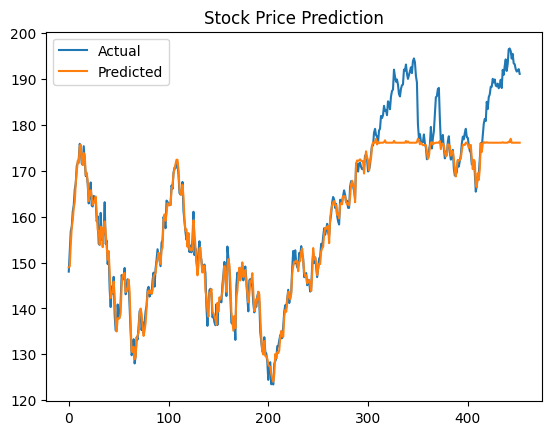

In [12]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()
